In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%config InlineBackend.figure_format = "retina"
plt.style.use(["seaborn-colorblind", "seaborn-darkgrid"])

import pyro
import pyro.distributions as dist
from pyro.util import ng_ones, ng_zeros

from utils import Laplace

#### Code 2.1

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([ 0.  ,  0.15,  0.4 ,  0.45,  0.  ])

#### Code 2.2

In [3]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

#### Code 2.3

In [4]:
def posterior_grid_approx(grid_points=20, success=6, tosses=9):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)

#### Code 2.4

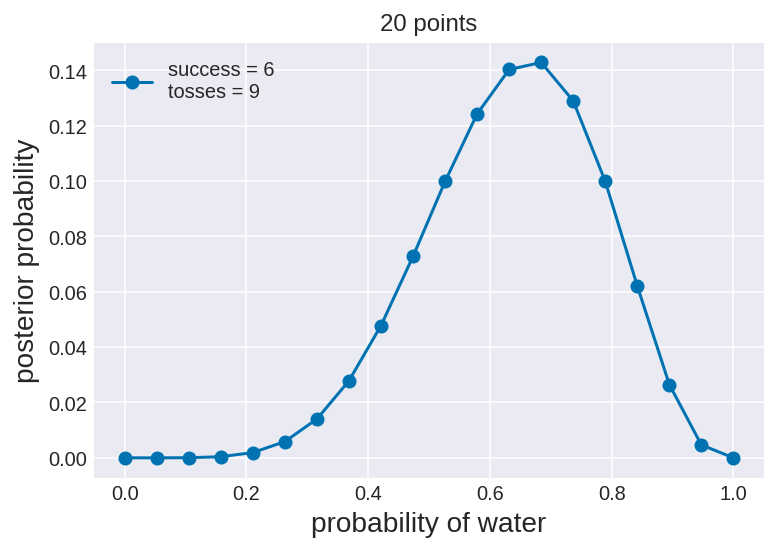

In [5]:
plt.plot(p_grid, posterior, "o-", label="success = {}\ntosses = {}".format(w, n))
plt.xlabel("probability of water", fontsize=14)
plt.ylabel("posterior probability", fontsize=14)
plt.title("{} points".format(points))
plt.legend(loc=0);

#### Code 2.5

In [6]:
#prior = (p_grid >= 0.5).astype(int)
#prior = np.exp(- 5 * abs(p_grid - 0.5))

#### Code 2.6

In [7]:
def globe(w, n):
    p = pyro.sample("p", dist.uniform, ng_zeros(1), ng_ones(1))  # unifrom prior
    pyro.sample("w", dist.binomial, p, n, obs=w)  # binomial likelihood

w, n = ng_ones(1)*6, 9
globe_qa = Laplace(globe, [("p", 0.5)]).fit(w, n)

# display summary of quadratic approximation
globe_qa.precis()

{'p': {'Mean': 0.6666660308837891,
  'StdDev': 0.1571349948644638,
  'pi_0.89': array([ 0.41553396,  0.9177981 ])}}

#### Code 2.7

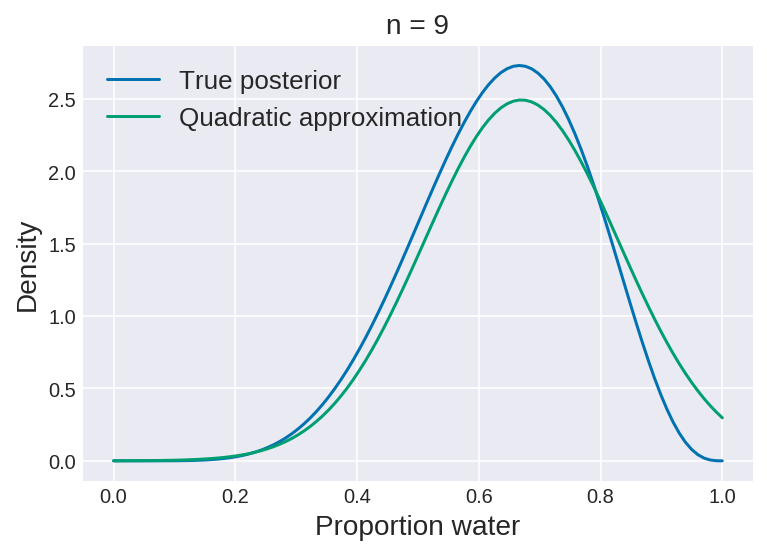

In [8]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label="True posterior")

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, 0.67, 0.16),
         label="Quadratic approximation")
plt.legend(loc=0, fontsize=13)

plt.title("n = {}".format(n), fontsize=14)
plt.xlabel("Proportion water", fontsize=14)
plt.ylabel("Density", fontsize=14);

In [9]:
import platform, sys, IPython, scipy, matplotlib
print("This notebook was createad on a computer {} running {} and using:\n"
      "Python {}\nIPython {}\nPyro {}\nNumPy {}\nSciPy {}\nMatplotlib {}".format(
          platform.machine(), " ".join(platform.linux_distribution()[:2]), sys.version[:5],
          IPython.__version__, pyro.__version__, np.__version__, scipy.__version__,
          matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.5.4
IPython 6.1.0
Pyro 0.1.2
NumPy 1.13.1
SciPy 0.19.1
Matplotlib 2.0.2
